In [1]:
import pandas as pd
from tqdm.notebook import tqdm
import os
from shutil import copyfile, move
import sys
import json

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
os.getcwd()

'C:\\Users\\150ho\\Desktop\\DS\\проект\\znaki'

In [3]:
os.chdir("..")

In [ ]:
!cp train_anno.json /content/yolov5
!cp val_anno.json /content/yolov5

In [ ]:
# !cp ./test_annotation /content/yolov5
# !cp ./train_annotation /content/yolov5

In [ ]:
# !pip install kaggle
# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !kaggle datasets download -d watchman/rtsd-dataset
# !unzip rtsd-dataset.zip
# !rm rtsd-dataset.zip
# !cp -r rtsd-frames/rtsd-frames/ .
# !rm -r rtsd-frames/rtsd-frames/

# Преобразование набора данных в YOLO-формат

In [ ]:
!git clone https://github.com/ultralytics/JSON2YOLO

Cloning into 'JSON2YOLO'...
remote: Enumerating objects: 283, done.
remote: Counting objects: 100% (119/119), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 283 (delta 106), reused 91 (delta 85), pack-reused 164
Receiving objects: 100% (283/283), 76.54 KiB | 7.65 MiB/s, done.
Resolving deltas: 100% (181/181), done.


In [ ]:
sys.path.append('./JSON2YOLO')
from JSON2YOLO.general_json2yolo import convert_coco_json

Нужно модифицировать 274 строку в файле general_json2yolo.py следующим образом:

h, w, f = img['height'], img['width'], img['file_name'].split('/')[1]

In [ ]:
test_path = 'test_annotation'
train_path = 'train_annotation'

os.makedirs(train_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

move('train_anno.json', os.path.join(train_path, 'train_anno.json'))
move('val_anno.json', os.path.join(test_path, 'val_anno.json'))

for folder in ['labels', 'images']:
    for path in [test_path, train_path]:
        os.makedirs(os.path.join(path, folder), exist_ok=True)

In [2]:
convert_coco_json(train_path)
for file in tqdm(os.listdir(os.path.join('new_dir/labels/train_anno'))):
    move(os.path.join('new_dir/labels/train_anno', file), os.path.join(train_path, 'labels', file))
    
convert_coco_json('./test_annotation/')
for file in tqdm(os.listdir(os.path.join('new_dir/labels/val_anno'))):
    move(os.path.join('new_dir/labels/val_anno', file), os.path.join(test_path, 'labels', file))

In [ ]:
test_labels = os.listdir(os.path.join(test_path, 'labels'))
train_labels = os.listdir(os.path.join(train_path, 'labels'))

test_labels = set(map(lambda x: x.split('.')[0], test_labels))
train_labels = set(map(lambda x: x.split('.')[0], train_labels))

images = 'rtsd-frames'
for file in os.listdir(images):
    name = file.split('.')[0]
    if name in train_labels:
        move(os.path.join(images, file), os.path.join(train_path,'images', file))
    if name in test_labels:
        move(os.path.join(images, file), os.path.join(test_path,'images', file))

In [ ]:
with open('label_map.json') as f:
    data = json.load(f)

In [ ]:
# list(data.keys())

In [2]:
%%writefile ..\yolov5\data\rtsd.yaml

# train and val datasets (image directory or *.txt file with image paths)
train: train_annotation/images  # train images (relative to 'path') 
val: test_annotation/images  # val images (relative to 'path') 


# number of classes
nc: 155

# class names
names: ['2_1', '1_23', '1_17', '3_24', '8_2_1', '5_20', '5_19_1', '5_16', '3_25', '6_16', '7_15', '2_2', '2_4', '8_13_1', '4_2_1', '1_20_3', '1_25', '3_4', '8_3_2', '3_4_1', '4_1_6', '4_2_3', '4_1_1', '1_33', '5_15_5', '3_27', '1_15', '4_1_2_1', '6_3_1', '8_1_1', '6_7', '5_15_3', '7_3', '1_19', '6_4', '8_1_4', '8_8', '1_16', '1_11_1', '6_6', '5_15_1', '7_2', '5_15_2', '7_12', '3_18', '5_6', '5_5', '7_4', '4_1_2', '8_2_2', '7_11', '1_22', '1_27', '2_3_2', '5_15_2_2', '1_8', '3_13', '2_3', '8_3_3', '2_3_3', '7_7', '1_11', '8_13', '1_12_2', '1_20', '1_12', '3_32', '2_5', '3_1', '4_8_2', '3_20', '3_2', '2_3_6', '5_22', '5_18', '2_3_5', '7_5', '8_4_1', '3_14', '1_2', '1_20_2', '4_1_4', '7_6', '8_1_3', '8_3_1', '4_3', '4_1_5', '8_2_3', '8_2_4', '1_31', '3_10', '4_2_2', '7_1', '3_28', '4_1_3', '5_4', '5_3', '6_8_2', '3_31', '6_2', '1_21', '3_21', '1_13', '1_14', '2_3_4', '4_8_3', '6_15_2', '2_6', '3_18_2', '4_1_2_2', '1_7', '3_19', '1_18', '2_7', '8_5_4', '5_15_7', '5_14', '5_21', '1_1', '6_15_1', '8_6_4', '8_15', '4_5', '3_11', '8_18', '8_4_4', '3_30', '5_7_1', '5_7_2', '1_5', '3_29', '6_15_3', '5_12', '3_16', '1_30', '5_11', '1_6', '8_6_2', '6_8_3', '3_12', '3_33', '8_4_3', '5_8', '8_14', '8_17', '3_6', '1_26', '8_5_2', '6_8_1', '5_17', '1_10', '8_16', '7_18', '7_14', '8_23']

Writing ..\yolov5\data\rtsd.yaml


In [3]:
# !git clone https://github.com/ultralytics/yolov5  # clone
%cd ..
%cd yolov5
%pip install -r requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5  v7.0-134-g23c4923 Python-3.9.12 torch-1.13.1+cpu CPU


Setup complete  (8 CPUs, 13.9 GB RAM, 222.6/237.7 GB disk)


In [ ]:
# %load_ext tensorboard
# %tensorboard --logdir runs/train

In [13]:
# !pip install -r requirements.txt

In [4]:
os.chdir("..")

In [10]:
os.getcwd()

In [3]:
%pwd

'C:\\Users\\150ho\\Desktop\\DS\\project\\znaki\\yolov5'

In [5]:
os.chdir('./yolov5')

In [15]:
!python train.py --img 1280 --batch -1 --epochs 100 --data rtsd1.yaml --weights yolov5m6.pt --project "RTSD1" --name "yolov5m61"

wandb: WARNING  wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
train: weights=yolov5m6.pt, cfg=, data=rtsd1.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=100, batch_size=-1, imgsz=1280, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=RTSD1, name=yolov5m61, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github:  YOLOv5 is out of date by 2 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5  v7.0-134-g23c4923 Python-3.9.12 torch-1.13.1+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay

In [ ]:
!python train.py --img 1280 --batch -1 --epochs 100 --data rtsd.yaml --weights yolov5m6.pt --project "RTSD" --name "yolov5m6"

2023-04-06 08:24:17.763980: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-06 08:24:18.773994: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=yolov5m6.pt, cfg=, data=rtsd.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=-1, imgsz=1280, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=RTSD, name=yolov5m6, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, 

In [ ]:
# !python train.py --resume /content/drive/MyDrive/RTSD/yolov5s6/weights/last.pt

In [ ]:
train: weights=yolov5s.pt, cfg=, data=data/coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=/content/drive/MyDrive/RTSD/yolov5s6/weights/last.pt, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-140-g1db9533 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, shear=0.0, perspective=0.0, flipud=0.0, fliplr=0.5, mosaic=1.0, mixup=0.0, copy_paste=0.0
ClearML: run 'pip install clearml' to automatically track, visualize and remotely train YOLOv5 🚀 in ClearML
Comet: run 'pip install comet_ml' to automatically track and visualize YOLOv5 🚀 runs in Comet
TensorBoard: Start with 'tensorboard --logdir RTSD', view at http://localhost:6006/

                 from  n    params  module                                  arguments                     
  0                -1  1      3520  models.common.Conv                      [3, 32, 6, 2, 2]              
  1                -1  1     18560  models.common.Conv                      [32, 64, 3, 2]                
  2                -1  1     18816  models.common.C3                        [64, 64, 1]                   
  3                -1  1     73984  models.common.Conv                      [64, 128, 3, 2]               
  4                -1  2    115712  models.common.C3                        [128, 128, 2]                 
  5                -1  1    295424  models.common.Conv                      [128, 256, 3, 2]              
  6                -1  3    625152  models.common.C3                        [256, 256, 3]                 
  7                -1  1    885504  models.common.Conv                      [256, 384, 3, 2]              
  8                -1  1    665856  models.common.C3                        [384, 384, 1]                 
  9                -1  1   1770496  models.common.Conv                      [384, 512, 3, 2]              
 10                -1  1   1182720  models.common.C3                        [512, 512, 1]                 
 11                -1  1    656896  models.common.SPPF                      [512, 512, 5]                 
 12                -1  1    197376  models.common.Conv                      [512, 384, 1, 1]              
 13                -1  1         0  torch.nn.modules.upsampling.Upsample    [None, 2, 'nearest']          
 14           [-1, 8]  1         0  models.common.Concat                    [1]                           
 15                -1  1    813312  models.common.C3                        [768, 384, 1, False]          
 16                -1  1     98816  models.common.Conv                      [384, 256, 1, 1]              
 17                -1  1         0  torch.nn.modules.upsampling.Upsample    [None, 2, 'nearest']          
 18           [-1, 6]  1         0  models.common.Concat                    [1]                           
 19                -1  1    361984  models.common.C3                        [512, 256, 1, False]          
 20                -1  1     33024  models.common.Conv                      [256, 128, 1, 1]              
 21                -1  1         0  torch.nn.modules.upsampling.Upsample    [None, 2, 'nearest']          
 22           [-1, 4]  1         0  models.common.Concat                    [1]                           
 23                -1  1     90880  models.common.C3                        [256, 128, 1, False]          
 24                -1  1    147712  models.common.Conv                      [128, 128, 3, 2]              
 25          [-1, 20]  1         0  models.common.Concat                    [1]                           
 26                -1  1    296448  models.common.C3                        [256, 256, 1, False]          
 27                -1  1    590336  models.common.Conv                      [256, 256, 3, 2]              
 28          [-1, 16]  1         0  models.common.Concat                    [1]                           
 29                -1  1    715008  models.common.C3                        [512, 384, 1, False]          
 30                -1  1   1327872  models.common.Conv                      [384, 384, 3, 2]              
 31          [-1, 12]  1         0  models.common.Concat                    [1]                           
 32                -1  1   1313792  models.common.C3                        [768, 512, 1, False]          
 33  [23, 26, 29, 32]  1    616320  models.yolo.Detect                      [155, [[19, 27, 44, 40, 38, 94], [96, 68, 86, 152, 180, 137], [140, 301, 303, 264, 238, 542], [436, 615, 739, 380, 925, 792]], [128, 256, 384, 512]]
Model summary: 281 layers, 12915520 parameters, 12915520 gradients, 17.6 GFLOPs

Transferred 459/459 items from /content/drive/MyDrive/RTSD/yolov5s6/weights/last.pt
AMP: checks passed ✅
AutoBatch: Computing optimal batch size for --imgsz 1280
AutoBatch: CUDA:0 (Tesla T4) 14.75G total, 0.40G reserved, 0.10G allocated, 14.25G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
    12915520       70.55         0.931         44.15         113.8      (1, 3, 1280, 1280)                    list
    12915520       141.1         1.783         40.08         73.42      (2, 3, 1280, 1280)                    list
    12915520       282.2         3.435         56.74         86.89      (4, 3, 1280, 1280)                    list
    12915520       564.4         6.637         115.1         138.3      (8, 3, 1280, 1280)                    list
    12915520        1129        13.032         235.7         266.1     (16, 3, 1280, 1280)                    list
AutoBatch: Using batch-size 13 for CUDA:0 11.13G/14.75G (75%) ✅
optimizer: SGD(lr=0.01) with parameter groups 75 weight(decay=0.0), 79 weight(decay=0.0005078125), 79 bias
Resuming training from /content/drive/MyDrive/RTSD/yolov5s6/weights/last.pt from epoch 9 to 10 total epochs
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
train: Scanning /content/train_annotation/labels... 54188 images, 0 backgrounds, 0 corrupt: 100% 54188/54188 [02:07<00:00, 423.86it/s] 
train: New cache created: /content/train_annotation/labels.cache
val: Scanning /content/test_annotation/labels... 5000 images, 0 backgrounds, 0 corrupt: 100% 5000/5000 [00:17<00:00, 292.71it/s]
val: New cache created: /content/test_annotation/labels.cache
Plotting labels to RTSD/yolov5m6/labels.jpg... 
Image sizes 1280 train, 1280 val
Using 2 dataloader workers
Logging results to RTSD/yolov5m6
Starting training for 10 epochs...

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
        9/9      10.8G     0.0151   0.004668    0.01274         10       1280: 100% 4169/4169 [1:40:08<00:00,  1.44s/it]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 193/193 [02:41<00:00,  1.20it/s]
                   all       5000       8866      0.827      0.442      0.478      0.355

1 epochs completed in 1.714 hours.
Optimizer stripped from RTSD/yolov5m6/weights/last.pt, 26.6MB
Optimizer stripped from RTSD/yolov5m6/weights/best.pt, 26.6MB

Validating RTSD/yolov5m6/weights/best.pt...
Fusing layers... 
Model summary: 206 layers, 12901408 parameters, 0 gradients, 17.4 GFLOPs
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 193/193 [02:41<00:00,  1.19it/s]
                   all       5000       8866      0.827      0.441      0.478      0.355
                   2_1       5000        934      0.919      0.984      0.985      0.773
                  1_23       5000        229      0.886      0.986      0.982      0.752
                  1_17       5000        107      0.877      0.944      0.972      0.719
                  3_24       5000        343      0.836      0.983      0.966      0.726
                 8_2_1       5000         74      0.499      0.932      0.791      0.582
                  5_20       5000        154      0.841      0.974      0.971      0.741
                5_19_1       5000       2117      0.841      0.976      0.969      0.721
                  5_16       5000        445       0.85      0.982      0.973      0.696
                  3_25       5000         10      0.879        0.6      0.669      0.474
                  6_16       5000         97       0.76      0.907      0.901       0.65
                  7_15       5000          3          1          0      0.024     0.0201
                   2_2       5000         47       0.87      0.936      0.949      0.757
                   2_4       5000        340      0.879      0.965      0.985      0.744
                8_13_1       5000         14      0.824      0.714      0.806      0.599
                 4_2_1       5000        120       0.79      0.975      0.903      0.644
                1_20_3       5000         11          1          0      0.195       0.13
                  1_25       5000         89      0.806      0.989      0.963      0.706
                   3_4       5000          1          1          0     0.0293     0.0263
                 8_3_2       5000          5          1          0      0.184     0.0879
                 3_4_1       5000         50      0.774       0.92       0.94      0.677
                 4_1_6       5000         11          1          0      0.118     0.0937
                 4_2_3       5000         76      0.895      0.961      0.968      0.725
                 4_1_1       5000        196      0.916      0.974      0.976      0.729
                  1_33       5000          5          1          0      0.057     0.0422
                5_15_5       5000        108      0.869      0.991       0.99      0.745
                  3_27       5000        290       0.85      0.969      0.977      0.731
                  1_15       5000         12      0.544        0.5      0.482      0.383
               4_1_2_1       5000         14      0.424      0.857      0.605      0.402
                 6_3_1       5000         20       0.93       0.95      0.964      0.696
                 8_1_1       5000         13       0.39      0.692      0.481      0.358
                   6_7       5000          9          1          0      0.135      0.106
                5_15_3       5000        144      0.899      0.984      0.982      0.756
                   7_3       5000         93      0.889      0.935      0.971      0.738
                  1_19       5000          5          1          0        0.2       0.17
                   6_4       5000         96      0.853      0.965       0.95      0.693
                 8_1_4       5000          2          1          0     0.0172     0.0118
                   8_8       5000          5          1          0      0.188      0.156
                  1_16       5000         31      0.494       0.63      0.596      0.447
                1_11_1       5000         36      0.439       0.75      0.541      0.395
                   6_6       5000         67      0.789      0.925      0.937      0.669
                5_15_1       5000        131      0.883      0.954      0.972      0.761
                   7_2       5000         15      0.168        0.2      0.283      0.227
                5_15_2       5000        440      0.887       0.98      0.981      0.726
                  7_12       5000          7          1          0      0.084     0.0712
                  3_18       5000         20       0.37       0.65       0.47      0.286
                   5_6       5000         60      0.891      0.967      0.976      0.746
                   5_5       5000         81      0.819      0.947      0.955      0.713
                   7_4       5000         11      0.449      0.818      0.525      0.395
                 4_1_2       5000         44      0.603      0.932      0.872      0.632
                 8_2_2       5000         16          1      0.608      0.808      0.571
                  7_11       5000         12          1          0      0.312      0.228
                  1_22       5000         77      0.913      0.948      0.973      0.745
                  1_27       5000          7          1          0      0.358      0.299
                 2_3_2       5000         85      0.473      0.929      0.595      0.446
              5_15_2_2       5000        116       0.84      0.957      0.967      0.793
                   1_8       5000         27      0.654      0.489      0.667      0.494
                  3_13       5000         21      0.655       0.81       0.81      0.603
                   2_3       5000         22          0          0      0.148      0.116
                 2_3_3       5000         58      0.336      0.759      0.369      0.276
                   7_7       5000         14      0.558      0.929      0.584      0.443
                  1_11       5000         35      0.534      0.851      0.546      0.391
                  8_13       5000         47      0.767      0.936      0.935      0.694
                1_12_2       5000         16          1          0      0.269      0.209
                  1_20       5000         12          1          0      0.152      0.111
                  1_12       5000         20          1          0       0.22      0.155
                  3_32       5000          7      0.382      0.286      0.193      0.152
                   2_5       5000         49      0.885       0.98       0.98      0.769
                   3_1       5000         86      0.795        0.9        0.9      0.582
                 4_8_2       5000          5          1          0     0.0804     0.0609
                  3_20       5000        142      0.927          1      0.993      0.748
                   3_2       5000         15      0.698      0.773       0.83      0.573
                 2_3_6       5000          1          1          0          0          0
                  5_18       5000          3          1          0    0.00626     0.0045
                   7_5       5000         30       0.44      0.833       0.81      0.662
                 8_4_1       5000          5          1          0      0.117     0.0903
                  3_14       5000          3          1          0      0.042     0.0319
                   1_2       5000         32      0.566      0.571      0.613      0.486
                1_20_2       5000         37      0.546      0.943      0.797      0.592
                 4_1_4       5000        103      0.772      0.981      0.856      0.653
                   7_6       5000          5          1          0     0.0268     0.0198
                 8_1_3       5000          4          1          0     0.0438     0.0325
                 8_3_1       5000         16      0.432      0.618      0.448      0.282
                   4_3       5000         16     0.0707    0.00884      0.624      0.435
                 4_1_5       5000         16          1          0      0.182      0.146
                 8_2_3       5000          7          0          0      0.203      0.143
                 8_2_4       5000          8        0.6      0.625       0.61      0.464
                  1_31       5000          3          1          0     0.0807     0.0645
                  3_10       5000          3          1          0      0.042     0.0271
                 4_2_2       5000         41      0.676      0.863      0.904      0.607
                   7_1       5000          5          1          0     0.0901      0.063
                  3_28       5000         34      0.853      0.912      0.955      0.659
                 4_1_3       5000          7          1          0      0.119      0.107
                   5_3       5000          4      0.926        0.5      0.622      0.403
                  3_31       5000         15      0.834        0.8       0.87      0.692
                   6_2       5000         13       0.79      0.846      0.829      0.604
                  1_21       5000          7          1          0     0.0436     0.0325
                  3_21       5000         45      0.931      0.978      0.987       0.73
                  1_13       5000          6          1          0      0.253      0.179
                  1_14       5000          9          1          0      0.283      0.217
                 2_3_4       5000          1          1          0     0.0226     0.0204
                6_15_2       5000          4          1          0      0.129     0.0925
                   2_6       5000          4          1          0      0.132      0.114
                3_18_2       5000         22      0.599      0.318      0.656      0.517
               4_1_2_2       5000         11      0.511          1      0.812        0.6
                   1_7       5000          2          1          0    0.00292    0.00263
                  3_19       5000          5          1          0      0.049     0.0414
                  1_18       5000          2          1          0     0.0133     0.0105
                   2_7       5000          1          1          0          0          0
                 8_5_4       5000          7          1          0      0.196      0.139
                5_15_7       5000         45      0.875      0.933       0.95      0.766
                  5_14       5000         27      0.573      0.889      0.857      0.632
                  5_21       5000          6          1          0     0.0749     0.0523
                   1_1       5000          3          1          0      0.108     0.0811
                6_15_1       5000         13       0.73      0.692      0.783      0.535
                 8_6_4       5000          5          1          0      0.161      0.116
                  8_15       5000         21      0.675      0.857      0.838      0.537
                  3_11       5000          3          1          0     0.0075     0.0053
                  8_18       5000          2          1          0    0.00428    0.00343
                 8_4_4       5000          4          1          0     0.0926     0.0685
                  3_30       5000          6          1          0      0.448      0.335
                 5_7_1       5000          8      0.283      0.741      0.389      0.224
                 5_7_2       5000         11      0.543          1      0.681      0.509
                   1_5       5000          7          1          0      0.138      0.108
                  3_29       5000         10          1          0      0.351      0.248
                  5_12       5000          1          1          0          0          0
                  5_11       5000          5          1          0      0.636      0.588
                 8_6_2       5000          2          1          0    0.00955    0.00573
                  3_12       5000          2          1          0    0.00773    0.00695
                 8_4_3       5000          3          1          0     0.0109    0.00875
                   5_8       5000          6          1          0      0.175      0.127
                  8_17       5000          2          1          0    0.00747    0.00597
                   3_6       5000          3          1          0    0.00621    0.00497
                  1_26       5000          1          1          0          0          0
                 8_5_2       5000          3          1          0     0.0201     0.0116
                 6_8_1       5000          1          1          0          0          0
                  5_17       5000          1          1          0          0          0
                  1_10       5000          4          1          0     0.0111    0.00856
                  7_18       5000          1          1          0     0.0166     0.0133
                  7_14       5000          2          1          0     0.0423     0.0423
Results saved to RTSD/yolov5m6

In [ ]:
# !python /content/yolov5/detect.py --source /content/img --weights /content/best.pt --save-txt --save-conf --name "yolov5m6_signs_test" --imgsz 1280 --exist-ok --conf-thres 0.1

In [ ]:
!python detect.py --source {путь к тестовому набору} --weights {путь к весам модели} --save-txt --save-conf --name "yolov5m6_signs_test" --imgsz 1280 --conf-thres 0.25

In [5]:
!python detect.py --source img --weights RTSD\last.pt --save-txt --save-conf --name "yolov5m6_test" --imgsz 1280 --exist-ok --conf-thres 0.1

detect: weights=['RTSD\\last.pt'], source=img, data=data\coco128.yaml, imgsz=[1280, 1280], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=yolov5m6_test, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-134-g23c4923 Python-3.9.12 torch-1.13.1+cpu CPU

Fusing layers... 
Model summary: 206 layers, 12901408 parameters, 0 gradients, 17.4 GFLOPs
image 1/3 C:\Users\150ho\Desktop\DS\project\znaki\yolov5\img\autosave09_11_2012_08_54_31_3.jpg: 768x1280 (no detections), 2186.8ms
image 2/3 C:\Users\150ho\Desktop\DS\project\znaki\yolov5\img\autosave10_10_2012_07_45_29_3.jpg: 768x1280 2 5_19_1s, 1927.6ms
image 3/3 C:\Users\150ho\Desktop\DS\project\znaki\yolov5\img\autosave16_10_2012_08_59_04_0.jpg: 768x1280 1 2_4, 1974.7ms
Speed: 10.3ms pre-pr

In [7]:
!python detect.py --source img --weights RTSD\best.pt --save-txt --save-conf --name "yolov5m6" --imgsz 1280 --exist-ok --conf-thres 0.1

detect: weights=['RTSD\\best.pt'], source=img, data=data\coco128.yaml, imgsz=[1280, 1280], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=yolov5m6, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-134-g23c4923 Python-3.9.12 torch-1.13.1+cpu CPU

Fusing layers... 
Model summary: 206 layers, 12901408 parameters, 0 gradients, 17.4 GFLOPs
image 1/2 C:\Users\150ho\Desktop\DS\project\znaki\yolov5\img\56.jpg: 832x1280 4 5_19_1s, 1 6_16, 1 2_4, 1 6_4, 2922.3ms
image 2/2 C:\Users\150ho\Desktop\DS\project\znaki\yolov5\img\57.jpg: 896x1280 1 8_2_1, 1 6_16, 1 3_4_1, 1 6_4, 1 8_3_1, 2846.9ms
Speed: 5.1ms pre-process, 2884.6ms inference, 16.4ms NMS per image at shape (1, 3, 1280, 1280)
Results saved to runs\detect\yolov5m6
2 labels saved to ru

In [4]:
!python detect.py --source img\222.mp4 --weights RTSD\best.pt

detect: weights=['RTSD\\best.pt'], source=img\222.mp4, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-134-g23c4923 Python-3.9.12 torch-1.13.1+cpu CPU

Fusing layers... 
Model summary: 206 layers, 12901408 parameters, 0 gradients, 17.4 GFLOPs
video 1/1 (1/331) C:\Users\150ho\Desktop\DS\project\znaki\yolov5\img\222.mp4: 384x640 1 5_19_1, 873.1ms
video 1/1 (2/331) C:\Users\150ho\Desktop\DS\project\znaki\yolov5\img\222.mp4: 384x640 2 5_19_1s, 881.1ms
video 1/1 (3/331) C:\Users\150ho\Desktop\DS\project\znaki\yolov5\img\222.mp4: 384x640 2 5_19_1s, 483.0ms
video 1/1 (4/331) C:\Users\150ho\Desktop\DS\project\znaki\yolov5\img\222.mp4: 384x6

video 1/1 (198/331) C:\Users\150ho\Desktop\DS\project\znaki\yolov5\img\222.mp4: 384x640 1 1_17, 1 3_24, 610.0ms
video 1/1 (199/331) C:\Users\150ho\Desktop\DS\project\znaki\yolov5\img\222.mp4: 384x640 1 1_17, 1 3_24, 686.1ms
video 1/1 (200/331) C:\Users\150ho\Desktop\DS\project\znaki\yolov5\img\222.mp4: 384x640 1 1_17, 1 3_24, 805.1ms
video 1/1 (201/331) C:\Users\150ho\Desktop\DS\project\znaki\yolov5\img\222.mp4: 384x640 1 1_17, 1 3_24, 491.0ms
video 1/1 (202/331) C:\Users\150ho\Desktop\DS\project\znaki\yolov5\img\222.mp4: 384x640 1 1_17, 1 3_24, 668.0ms
video 1/1 (203/331) C:\Users\150ho\Desktop\DS\project\znaki\yolov5\img\222.mp4: 384x640 1 1_17, 1 3_24, 771.1ms
video 1/1 (204/331) C:\Users\150ho\Desktop\DS\project\znaki\yolov5\img\222.mp4: 384x640 1 1_17, 1 3_24, 864.6ms
video 1/1 (205/331) C:\Users\150ho\Desktop\DS\project\znaki\yolov5\img\222.mp4: 384x640 1 1_17, 1 3_24, 844.1ms
video 1/1 (206/331) C:\Users\150ho\Desktop\DS\project\znaki\yolov5\img\222.mp4: 384x640 1 1_17, 1 3_24, 

In [3]:
# display.Image(filename='runs/detect/yolov5m6_test/autosave10_10_2012_07_45_29_3.jpg', width=600)

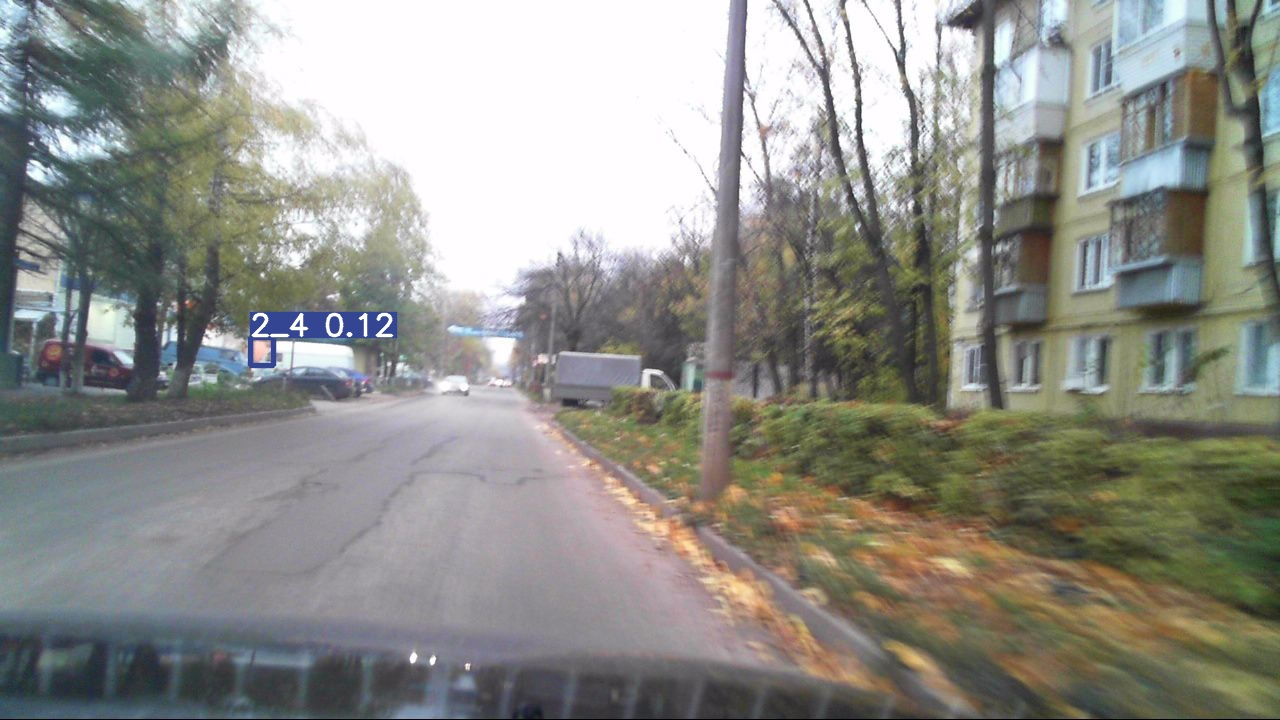

In [8]:
display.Image(filename='runs/detect/yolov5m6_test/autosave16_10_2012_08_59_04_0.jpg', width=600)

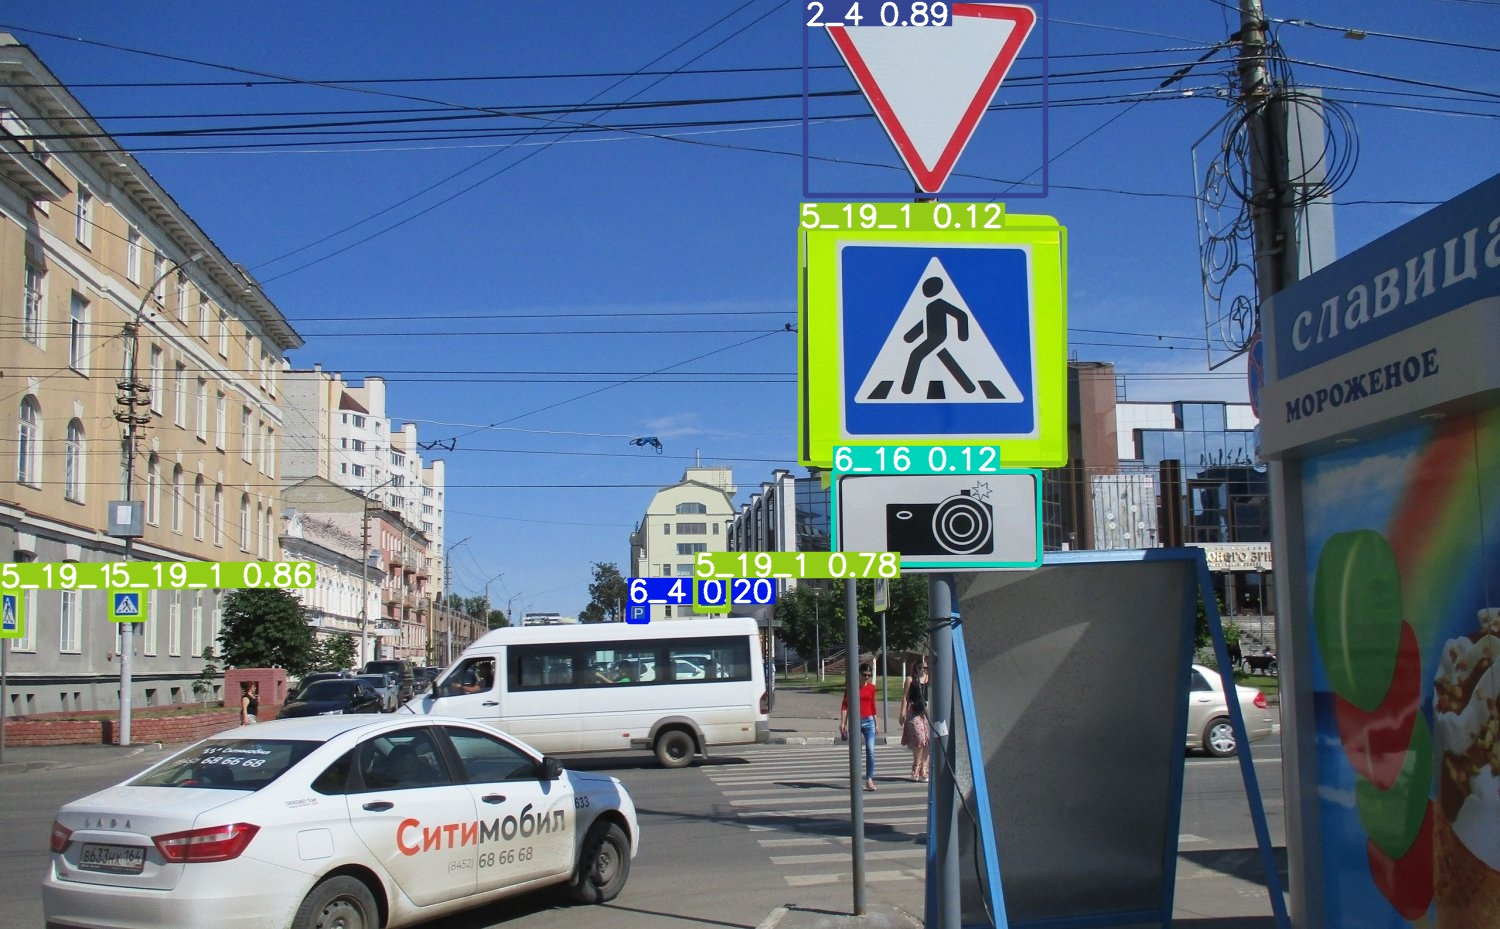

In [9]:
display.Image(filename='runs/detect/yolov5m6/56.jpg', width=600)

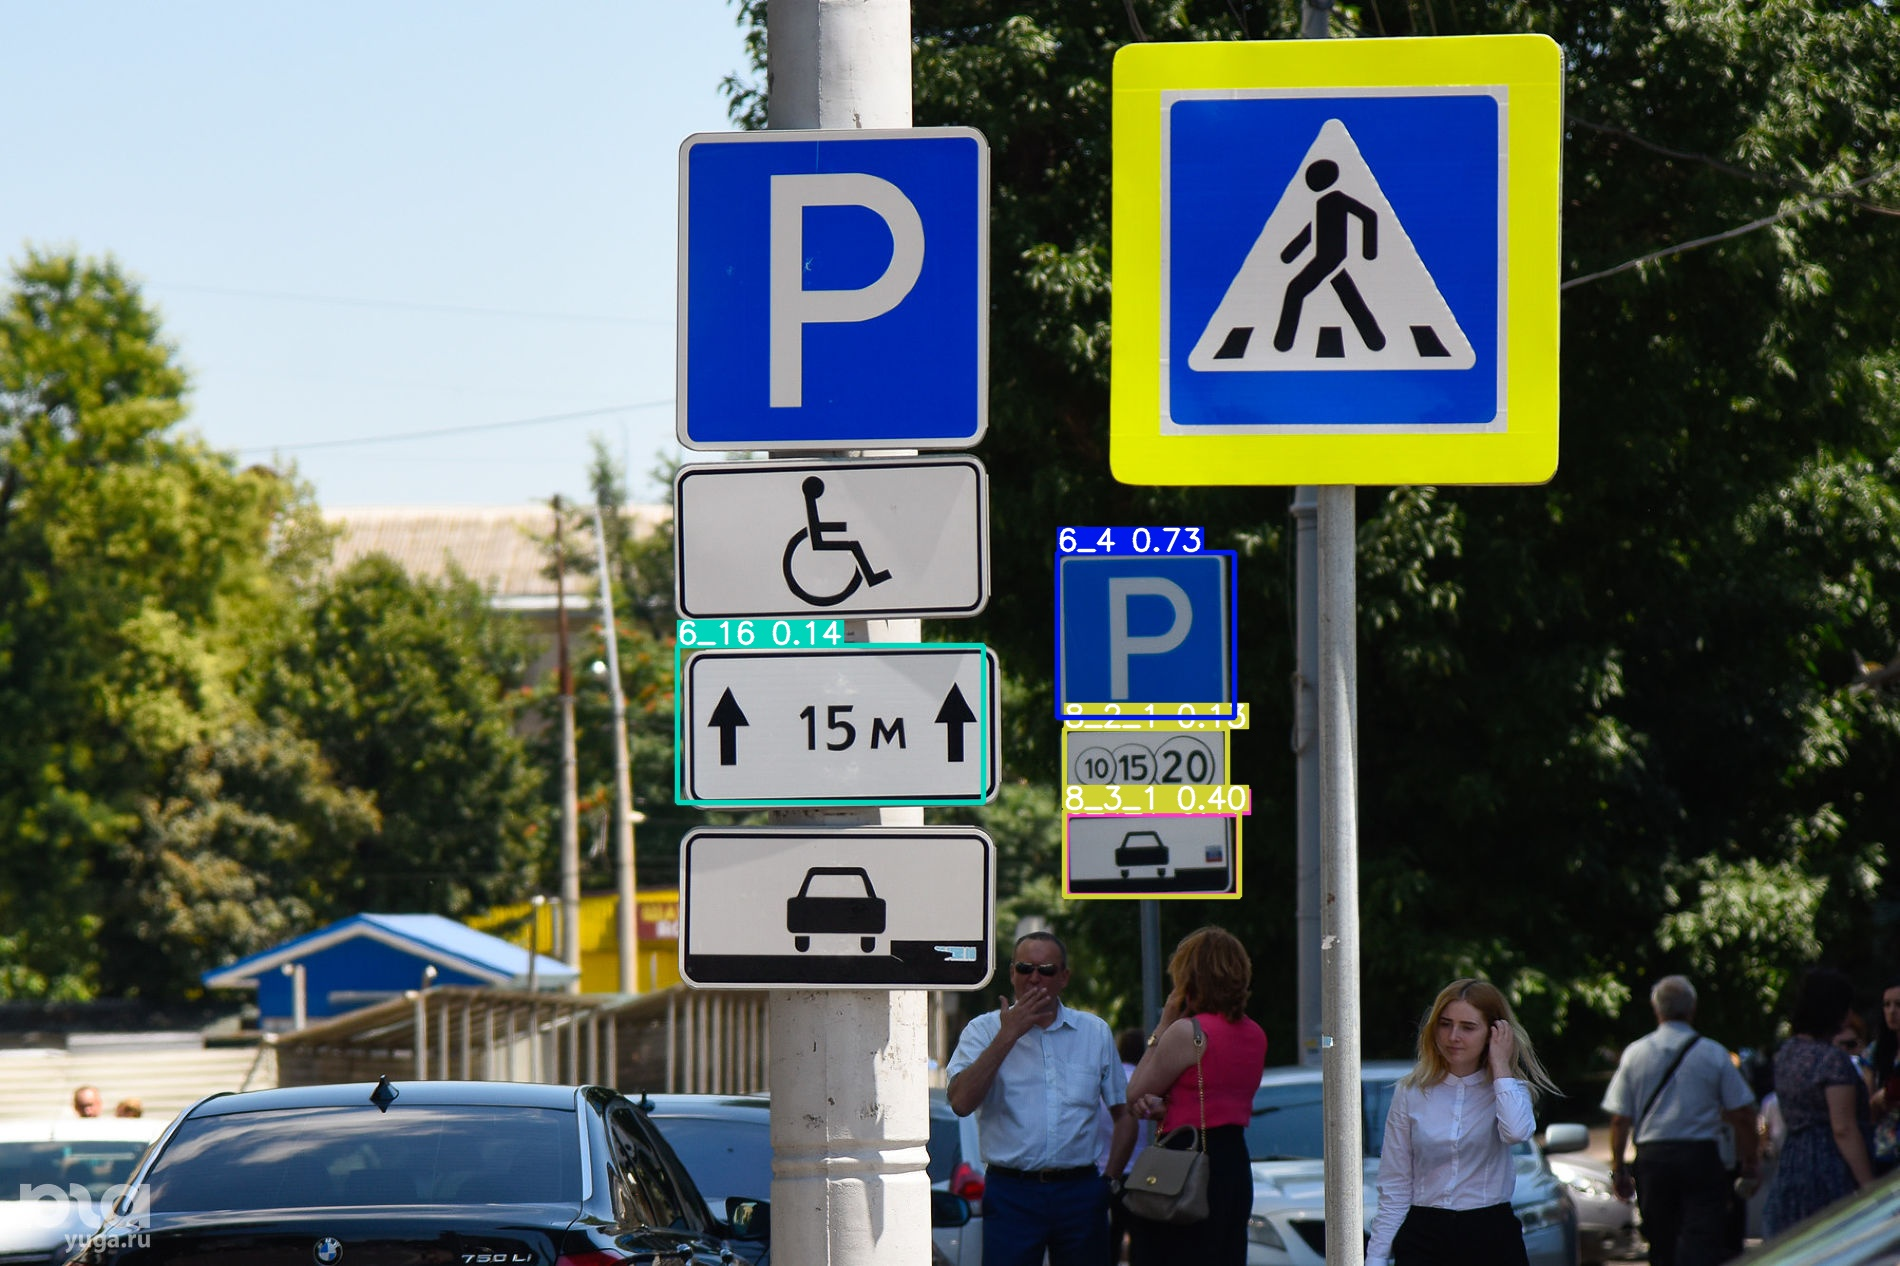

In [10]:
display.Image(filename='runs/detect/yolov5m6/57.jpg', width=600)